In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   object
 6   Liabilities     2059 non-null   object
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(2), object(7)
memory usage: 144.9+ KB


In [7]:
df_train['Criminal Case'].value_counts()

Criminal Case
0     1135
1      368
2      165
3      102
4       68
5       53
6       36
7       32
8       17
9       16
10       9
12       7
11       7
13       5
18       5
16       4
22       4
25       3
14       3
38       2
29       2
52       2
19       2
30       1
43       1
24       1
49       1
17       1
87       1
23       1
15       1
26       1
27       1
73       1
34       1
Name: count, dtype: int64

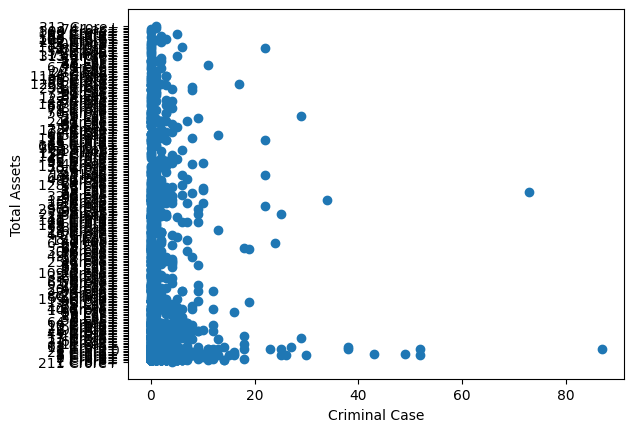

In [8]:
#plot Criminal case vs Total Assets scatter plot
plt.scatter(df_train['Criminal Case'], df_train['Total Assets'])
plt.xlabel('Criminal Case')
plt.ylabel('Total Assets')
plt.show()



<Axes: xlabel='Criminal Case'>

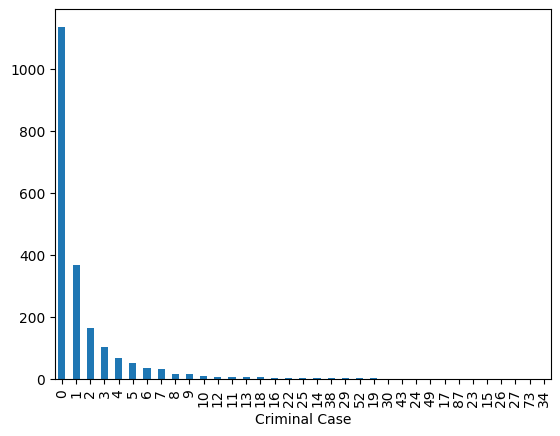

In [9]:
df_train['Criminal Case'].value_counts().plot(kind='bar')

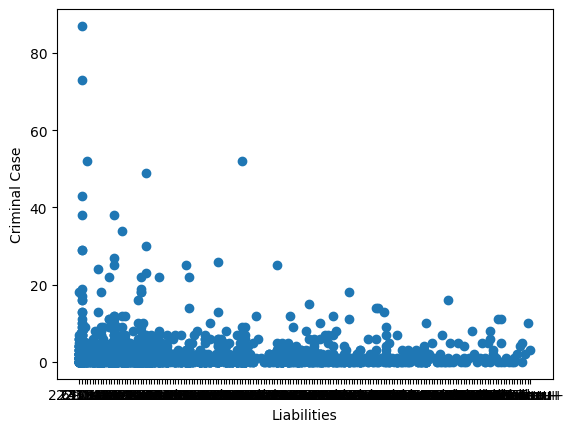

In [10]:
#plot Criminal case vs Liabilities scatter plot
plt.scatter(df_train['Liabilities'], df_train['Criminal Case'])
plt.xlabel('Liabilities')
plt.ylabel('Criminal Case')
plt.show()


In [11]:
df_train.drop(['Constituency ∇'],inplace=True,axis=1)


<Axes: xlabel='state'>

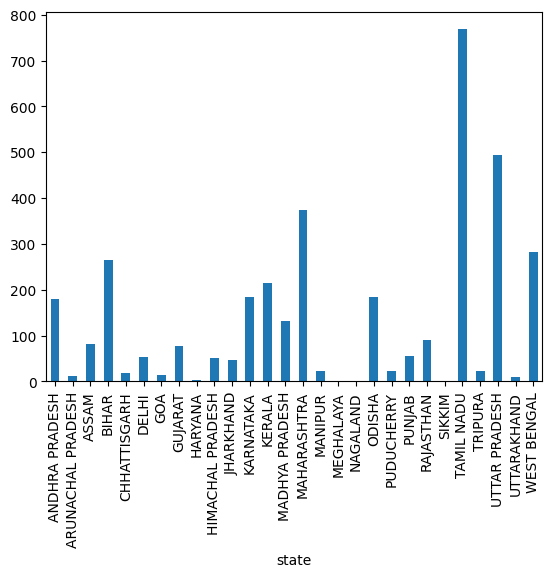

In [12]:
#state vs criminal cases bar plot
#criminal cases grouped by state
df_train.groupby('state')['Criminal Case'].sum().plot(kind='bar')


In [13]:
#convert total asset in integer
#if crore+ then multiply by 10000000
#if lakh+ then multiply by 100000
#if thousand+ then multiply by 1000
#if hundred+ then multiply by 100
def convert_total_assets(value):
    if 'Crore+' in value:
        return int(float(value.split()[0])*10000000)
    elif 'Lac+' in value:
        return int(float(value.split()[0])*100000)
    elif 'Thou+' in value:
        return int(float(value.split()[0])*1000)
    elif 'Hund+' in value:
        return int(float(value.split()[0])*100)
    else:
        return int(value)
    
df_train['Total Assets'] = df_train['Total Assets'].apply(convert_total_assets)
df_test['Total Assets'] = df_test['Total Assets'].apply(convert_total_assets)
df_train['Liabilities'] = df_train['Liabilities'].apply(convert_total_assets)
df_test['Liabilities'] = df_test['Liabilities'].apply(convert_total_assets)

In [14]:
df_train['Total Assets'].value_counts()

Total Assets
10000000      274
20000000      229
0             189
30000000      135
40000000      132
             ... 
450000000       1
1120000000      1
6680000000      1
3630000000      1
3120000000      1
Name: count, Length: 210, dtype: int64

In [15]:
is_dr = df_train['Candidate'].apply(lambda x: 'Dr.' in x)
df_train['is_dr'] = is_dr

In [16]:
df_train['Liabilities'].corr(df_train['Criminal Case'])

-0.000980801656310423

In [17]:
df_train['Liabilities'].corr(df_train['Total Assets'])

0.5975075932487341

In [18]:
#correlation between total assets and criminal cases
df_train['Total Assets'].corr(df_train['Criminal Case'])

-0.01298533729036144

In [19]:
#category 1: assets greater than 1 crore
#category 2: assets less than 1 crore but greater than 50 lakhs
#category 3: assets less than 50 lakhs but greater than 1 lakh
#category 4: assets less than 1 lakh
#ordinal encode Total Assets
def ordinal_encode_total_assets(value):
    if value >= 10000000:
        return 4
    elif value >= 5000000 and value < 10000000:
        return 3
    elif value >= 100000 and value < 5000000:
        return 2
    else:
        return 1
    
df_train['Total Assets Category'] = df_train['Total Assets'].apply(ordinal_encode_total_assets)
df_test['Total Assets Category'] = df_test['Total Assets'].apply(ordinal_encode_total_assets)
df_train['Liabilities Category'] = df_train['Liabilities'].apply(ordinal_encode_total_assets)
df_test['Liabilities Category'] = df_test['Liabilities'].apply(ordinal_encode_total_assets)

In [20]:
df_train['Total Assets Category'].value_counts()


Total Assets Category
4    1528
1     197
3     179
2     155
Name: count, dtype: int64

In [21]:
df_train['Criminal Case'].value_counts()

Criminal Case
0     1135
1      368
2      165
3      102
4       68
5       53
6       36
7       32
8       17
9       16
10       9
12       7
11       7
13       5
18       5
16       4
22       4
25       3
14       3
38       2
29       2
52       2
19       2
30       1
43       1
24       1
49       1
17       1
87       1
23       1
15       1
26       1
27       1
73       1
34       1
Name: count, dtype: int64

In [22]:
#category 1: no criminal case
#category 2: 1-5 criminal cases
#category 3: 6-10 criminal cases
#category 4: more than 10 criminal cases
#ordinal encode Criminal Case

def ordinal_encode_criminal_case(value):
    if value == 0:
        return 1
    elif value >0 and value<=5:
        return 2
    elif value >5 and value<=10:
        return 3
    else:
        return 4
    
df_train['Criminal Case Category'] = df_train['Criminal Case'].apply(ordinal_encode_criminal_case)
df_test['Criminal Case Category'] = df_test['Criminal Case'].apply(ordinal_encode_criminal_case)

In [23]:
#df_train.drop(['Criminal Case','Total Assets'],inplace=True,axis=1)

In [24]:
df_train.head()

,ID,Candidate,Party,Criminal Case,Total Assets,Liabilities,state,Education,is_dr,Total Assets Category,Liabilities Category,Criminal Case Category
0,0,M.K. Mohan,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass,False,4,4,2
1,1,Khatik Ramesh Prasad,BJP,0,10000000,0,MADHYA PRADESH,12th Pass,False,4,1,1
2,2,Dr. Mantar Gowda,INC,0,70000000,2200000,KARNATAKA,Post Graduate,True,4,2,1
3,3,Kundan Kumar,BJP,0,90000000,2400000,BIHAR,Post Graduate,False,4,2,1
4,4,Swapan Majumder,BJP,2,20000000,6100000,WEST BENGAL,8th Pass,False,4,3,2


In [25]:
df_train['Total Assets Category'].value_counts()

Total Assets Category
4    1528
1     197
3     179
2     155
Name: count, dtype: int64

In [26]:
#correlation between total assets category and criminal case category
df_train['Total Assets Category'].corr(df_train['Criminal Case Category'])



-0.027093554198115998

In [27]:
df_train.head()

,ID,Candidate,Party,Criminal Case,Total Assets,Liabilities,state,Education,is_dr,Total Assets Category,Liabilities Category,Criminal Case Category
0,0,M.K. Mohan,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass,False,4,4,2
1,1,Khatik Ramesh Prasad,BJP,0,10000000,0,MADHYA PRADESH,12th Pass,False,4,1,1
2,2,Dr. Mantar Gowda,INC,0,70000000,2200000,KARNATAKA,Post Graduate,True,4,2,1
3,3,Kundan Kumar,BJP,0,90000000,2400000,BIHAR,Post Graduate,False,4,2,1
4,4,Swapan Majumder,BJP,2,20000000,6100000,WEST BENGAL,8th Pass,False,4,3,2


In [28]:
df_train['Party'].value_counts()

Party
BJP                         862
INC                         365
AITC                        130
AAP                          94
YSRCP                        86
DMK                          73
BJD                          65
SP                           62
CPI(M)                       43
RJD                          42
IND                          38
NCP                          34
AIADMK                       34
JD(U)                        32
SHS                          29
NPP                          20
JMM                          14
NDPP                          9
TDP                           8
JD(S)                         7
Sikkim Krantikari Morcha      5
CPI                           4
Tipra Motha Party             3
Name: count, dtype: int64

<Axes: xlabel='Party'>

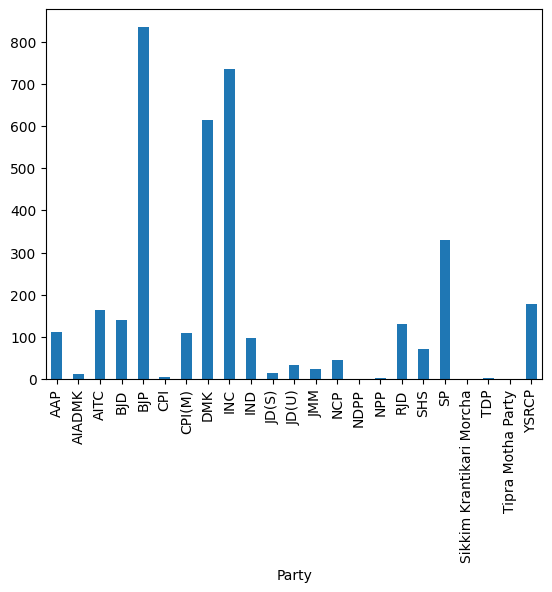

In [29]:
#Criminal case grouped by party
df_train.groupby('Party')['Criminal Case'].sum().plot(kind='bar')

8th Pass


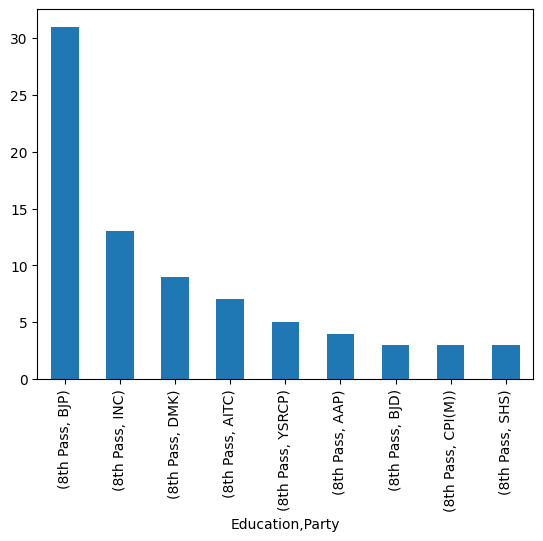

12th Pass


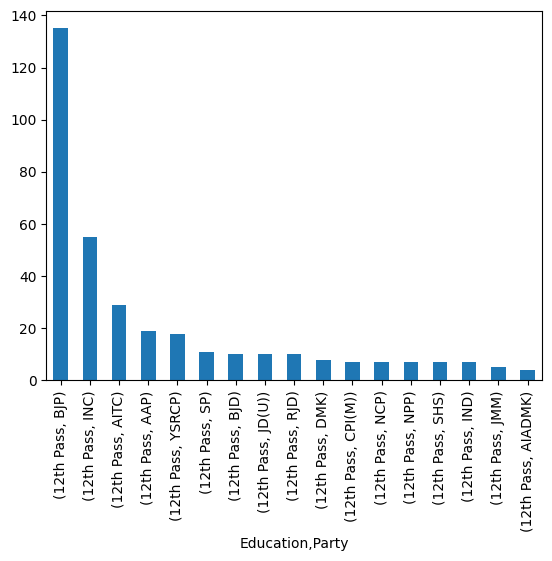

Post Graduate


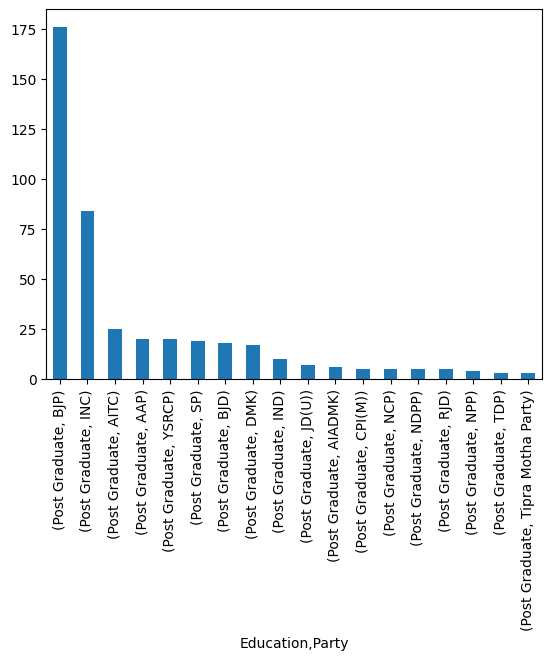

Graduate Professional


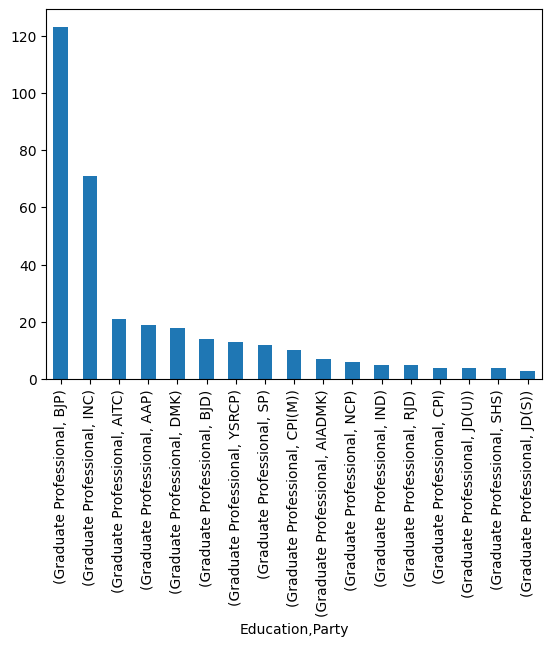

Graduate


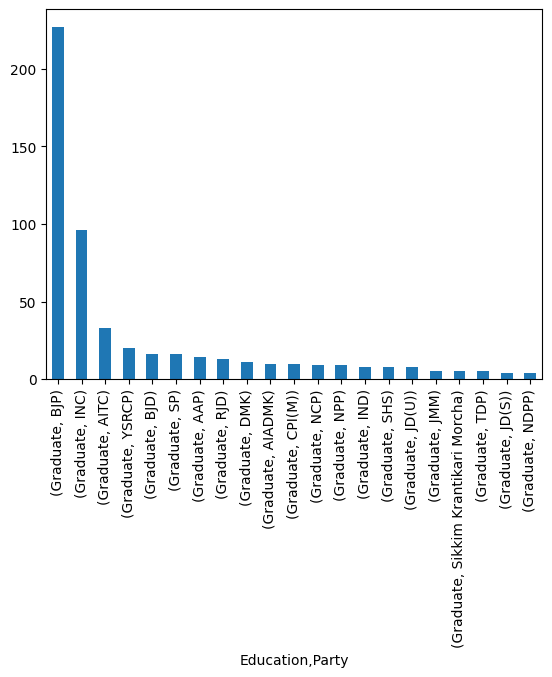

10th Pass


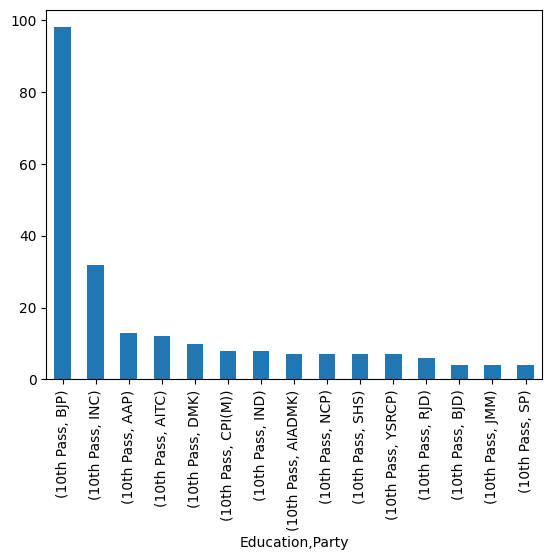

Others


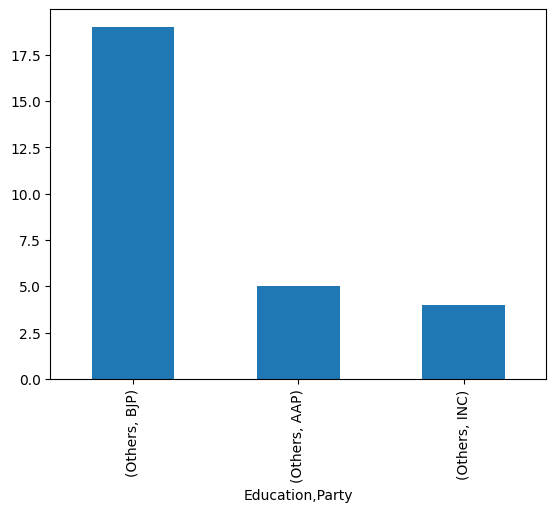

Doctorate


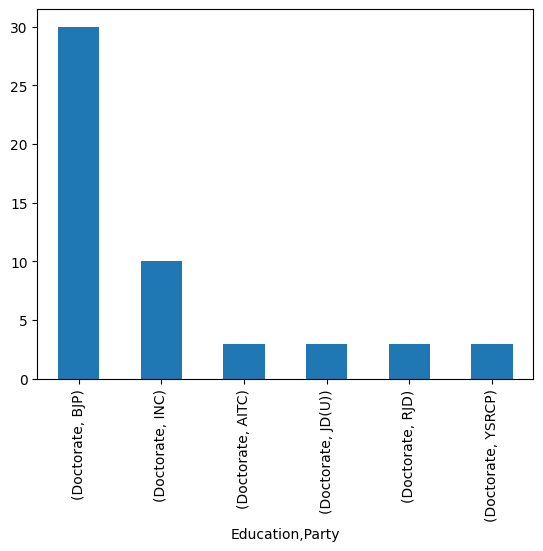

Literate


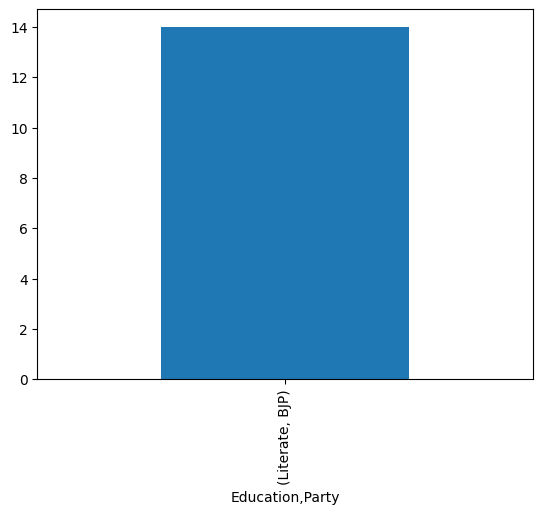

5th Pass


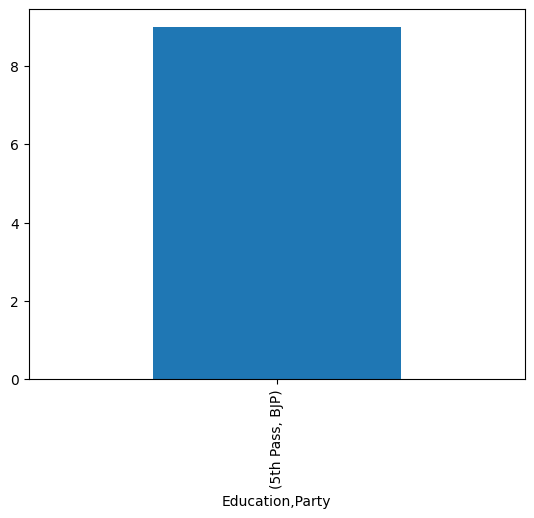

In [30]:
# get data where Education is Graduate
for i in df_train['Education'].unique():
    print(i)
    df_train_graduate = df_train[df_train['Education'] == i]
    df_train_graduate.groupby('Education')['Party'].value_counts().plot(kind='bar')
    plt.show()

In [31]:
df_train['Party'].value_counts()

Party
BJP                         862
INC                         365
AITC                        130
AAP                          94
YSRCP                        86
DMK                          73
BJD                          65
SP                           62
CPI(M)                       43
RJD                          42
IND                          38
NCP                          34
AIADMK                       34
JD(U)                        32
SHS                          29
NPP                          20
JMM                          14
NDPP                          9
TDP                           8
JD(S)                         7
Sikkim Krantikari Morcha      5
CPI                           4
Tipra Motha Party             3
Name: count, dtype: int64